In [1]:
!pip install pandas numpy statsmodels fastapi uvicorn requests matplotlib

  Using cached uvicorn-0.32.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached uvicorn-0.32.1-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.6 MB/s eta 0:00:0000:0100:01m
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.0 MB/s eta 0:00:00
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 587.5 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

# Load the dataset
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'  # Replace with actual URL
dataset = pd.read_csv(url)

# Display the first few rows
print(dataset.head())

       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2024  202401   NaN            NaN   
1  Alkoholunfälle   insgesamt  2024  202402   NaN            NaN   
2  Alkoholunfälle   insgesamt  2024  202403   NaN            NaN   
3  Alkoholunfälle   insgesamt  2024  202404   NaN            NaN   
4  Alkoholunfälle   insgesamt  2024  202405   NaN            NaN   

   VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0                       NaN                             NaN   
1                       NaN                             NaN   
2                       NaN                             NaN   
3                       NaN                             NaN   
4                       NaN                             NaN   

   ZWOELF_MONATE_MITTELWERT  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  


In [3]:
# Rename columns to English
dataset.rename(columns={
    "MONATSZAHL": "Category",
    "AUSPRAEGUNG": "Accident-Type",
    "JAHR": "Year",
    "MONAT": "Month",
    "WERT": "Value",
    "VORJAHRESWERT": "Previous-Year-Value",
    "VERAEND_VORMONAT_PROZENT": "Change-From-Previous-Month-Percent",
    "VERAEND_VORJAHRESMONAT_PROZENT": "Change-From-Previous-Year-Month-Percent",
    "ZWOELF_MONATE_MITTELWERT": "12-Month-Average"
}, inplace=True)

# Display the first few rows
print(dataset.head())

         Category Accident-Type  Year   Month  Value  Previous-Year-Value  \
0  Alkoholunfälle     insgesamt  2024  202401    NaN                  NaN   
1  Alkoholunfälle     insgesamt  2024  202402    NaN                  NaN   
2  Alkoholunfälle     insgesamt  2024  202403    NaN                  NaN   
3  Alkoholunfälle     insgesamt  2024  202404    NaN                  NaN   
4  Alkoholunfälle     insgesamt  2024  202405    NaN                  NaN   

   Change-From-Previous-Month-Percent  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

   Change-From-Previous-Year-Month-Percent  12-Month-Average  
0                                      NaN               NaN  
1                                      NaN               NaN  
2                                      NaN               NaN  
3                                     

In [4]:
# Check unique values in the Category column
print("Unique Categories:", dataset['Category'].unique())

# Check unique values in the Accident-Type column
print("Unique Accident-Types:", dataset['Accident-Type'].unique())

Unique Categories: ['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
Unique Accident-Types: ['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [5]:
# Filter for records with 'Alkoholunfälle' and 'insgesamt', and Year <= 2020
filtered_dataset = dataset[
    (dataset['Category'] == 'Alkoholunfälle') &  # Filter for the correct category
    (dataset['Accident-Type'] == 'insgesamt') &  # Filter for the correct accident type
    (dataset['Year'] <= 2020)                    # Only include records until 2020
]

# Check if data is present after filtering
print("Filtered Dataset:")
print(filtered_dataset.head())

Filtered Dataset:
          Category Accident-Type  Year   Month  Value  Previous-Year-Value  \
50  Alkoholunfälle     insgesamt  2020   Summe  430.0                434.0   
51  Alkoholunfälle     insgesamt  2020  202001   28.0                 22.0   
52  Alkoholunfälle     insgesamt  2020  202002   40.0                 28.0   
53  Alkoholunfälle     insgesamt  2020  202003   27.0                 34.0   
54  Alkoholunfälle     insgesamt  2020  202004   26.0                 36.0   

    Change-From-Previous-Month-Percent  \
50                                 NaN   
51                              -20.00   
52                               42.86   
53                              -32.50   
54                               -3.70   

    Change-From-Previous-Year-Month-Percent  12-Month-Average  
50                                    -0.92               NaN  
51                                    27.27              37.0  
52                                    42.86              38.0  
53  

In [6]:
# Check for missing values in relevant columns
print(dataset[['Category', 'Accident-Type', 'Year', 'Month', 'Value']].isnull().sum())

Category           0
Accident-Type      0
Year               0
Month              0
Value            168
dtype: int64


In [7]:
dataset = dataset.dropna(subset=['Value'])

In [8]:
filtered_dataset = dataset[
    (dataset['Category'] == 'Alkoholunfälle') &
    (dataset['Accident-Type'] == 'insgesamt') &
    (dataset['Year'] <= 2020)
]

print("Filtered Dataset After Handling Missing Data:")
print(filtered_dataset.head())

Filtered Dataset After Handling Missing Data:
          Category Accident-Type  Year   Month  Value  Previous-Year-Value  \
50  Alkoholunfälle     insgesamt  2020   Summe  430.0                434.0   
51  Alkoholunfälle     insgesamt  2020  202001   28.0                 22.0   
52  Alkoholunfälle     insgesamt  2020  202002   40.0                 28.0   
53  Alkoholunfälle     insgesamt  2020  202003   27.0                 34.0   
54  Alkoholunfälle     insgesamt  2020  202004   26.0                 36.0   

    Change-From-Previous-Month-Percent  \
50                                 NaN   
51                              -20.00   
52                               42.86   
53                              -32.50   
54                               -3.70   

    Change-From-Previous-Year-Month-Percent  12-Month-Average  
50                                    -0.92               NaN  
51                                    27.27              37.0  
52                                    42

In [9]:
# Check unique values in 'Year' and 'Month' columns
print("Unique values in 'Year':", filtered_dataset['Year'].unique())
print("Unique values in 'Month':", filtered_dataset['Month'].unique())

Unique values in 'Year': [2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000]
Unique values in 'Month': ['Summe' '202001' '202002' '202003' '202004' '202005' '202006' '202007'
 '202008' '202009' '202010' '202011' '202012' '201901' '201902' '201903'
 '201904' '201905' '201906' '201907' '201908' '201909' '201910' '201911'
 '201912' '201801' '201802' '201803' '201804' '201805' '201806' '201807'
 '201808' '201809' '201810' '201811' '201812' '201701' '201702' '201703'
 '201704' '201705' '201706' '201707' '201708' '201709' '201710' '201711'
 '201712' '201601' '201602' '201603' '201604' '201605' '201606' '201607'
 '201608' '201609' '201610' '201611' '201612' '201501' '201502' '201503'
 '201504' '201505' '201506' '201507' '201508' '201509' '201510' '201511'
 '201512' '201401' '201402' '201403' '201404' '201405' '201406' '201407'
 '201408' '201409' '201410' '201411' '201412' '201301' '201302' '201303'
 '201304' '201305' '201306' '201307' '2

In [10]:
# Remove rows where 'Month' is 'Summe'
filtered_dataset = filtered_dataset[filtered_dataset['Month'] != 'Summe']

# Verify the unique values in 'Month' after filtering
print("Unique values in 'Month':", filtered_dataset['Month'].unique())

Unique values in 'Month': ['202001' '202002' '202003' '202004' '202005' '202006' '202007' '202008'
 '202009' '202010' '202011' '202012' '201901' '201902' '201903' '201904'
 '201905' '201906' '201907' '201908' '201909' '201910' '201911' '201912'
 '201801' '201802' '201803' '201804' '201805' '201806' '201807' '201808'
 '201809' '201810' '201811' '201812' '201701' '201702' '201703' '201704'
 '201705' '201706' '201707' '201708' '201709' '201710' '201711' '201712'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '201511' '201512'
 '201401' '201402' '201403' '201404' '201405' '201406' '201407' '201408'
 '201409' '201410' '201411' '201412' '201301' '201302' '201303' '201304'
 '201305' '201306' '201307' '201308' '201309' '201310' '201311' '201312'
 '201201' '201202' '201203' '201204' '201205' '201206' '201207' '201208'
 '201209' '201210' '20121

In [11]:
# Convert 'Month' to string and extract the last two characters as the month
filtered_dataset['Month'] = filtered_dataset['Month'].astype(str).str[-2:].astype(int)

# Confirm the cleaned dataset
print(filtered_dataset.head())

          Category Accident-Type  Year  Month  Value  Previous-Year-Value  \
51  Alkoholunfälle     insgesamt  2020      1   28.0                 22.0   
52  Alkoholunfälle     insgesamt  2020      2   40.0                 28.0   
53  Alkoholunfälle     insgesamt  2020      3   27.0                 34.0   
54  Alkoholunfälle     insgesamt  2020      4   26.0                 36.0   
55  Alkoholunfälle     insgesamt  2020      5   40.0                 39.0   

    Change-From-Previous-Month-Percent  \
51                              -20.00   
52                               42.86   
53                              -32.50   
54                               -3.70   
55                               53.85   

    Change-From-Previous-Year-Month-Percent  12-Month-Average  
51                                    27.27              37.0  
52                                    42.86              38.0  
53                                   -20.59              37.0  
54                          

In [12]:
# Create a 'Date' column
filtered_dataset['Date'] = pd.to_datetime(
    filtered_dataset[['Year', 'Month']].assign(Day=1)
)

# Sort by Date
filtered_dataset = filtered_dataset.sort_values(by='Date')

# Set 'Date' as the index
filtered_dataset.set_index('Date', inplace=True)

# Display the cleaned dataset
print(filtered_dataset.head())

                  Category Accident-Type  Year  Month  Value  \
Date                                                           
2000-01-01  Alkoholunfälle     insgesamt  2000      1   78.0   
2000-02-01  Alkoholunfälle     insgesamt  2000      2   53.0   
2000-03-01  Alkoholunfälle     insgesamt  2000      3   73.0   
2000-04-01  Alkoholunfälle     insgesamt  2000      4   78.0   
2000-05-01  Alkoholunfälle     insgesamt  2000      5   96.0   

            Previous-Year-Value  Change-From-Previous-Month-Percent  \
Date                                                                  
2000-01-01                  NaN                                 NaN   
2000-02-01                  NaN                              -32.05   
2000-03-01                  NaN                               37.74   
2000-04-01                  NaN                                6.85   
2000-05-01                  NaN                               23.08   

            Change-From-Previous-Year-Month-Percent  

In [13]:
# Check for any remaining issues
print(filtered_dataset.info())
print(filtered_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2000-01-01 to 2020-12-01
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Category                                 252 non-null    object 
 1   Accident-Type                            252 non-null    object 
 2   Year                                     252 non-null    int64  
 3   Month                                    252 non-null    int64  
 4   Value                                    252 non-null    float64
 5   Previous-Year-Value                      240 non-null    float64
 6   Change-From-Previous-Month-Percent       251 non-null    float64
 7   Change-From-Previous-Year-Month-Percent  240 non-null    float64
 8   12-Month-Average                         252 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 19.7+ KB
None
Category                               

In [14]:
filtered_dataset = filtered_dataset.drop(columns=['Previous-Year-Value', 'Change-From-Previous-Year-Month-Percent'])

In [15]:
print(filtered_dataset.isnull().sum())

Category                              0
Accident-Type                         0
Year                                  0
Month                                 0
Value                                 0
Change-From-Previous-Month-Percent    1
12-Month-Average                      0
dtype: int64


In [16]:
mean_value = filtered_dataset['Change-From-Previous-Month-Percent'].mean()
filtered_dataset['Change-From-Previous-Month-Percent'].fillna(mean_value, inplace=True)

/var/folders/xp/hk3smldd0s13_p573l152qhm0000gn/T/ipykernel_17152/309756599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_dataset['Change-From-Previous-Month-Percent'].fillna(mean_value, inplace=True)


In [17]:
print(filtered_dataset.isnull().sum())

Category                              0
Accident-Type                         0
Year                                  0
Month                                 0
Value                                 0
Change-From-Previous-Month-Percent    0
12-Month-Average                      0
dtype: int64


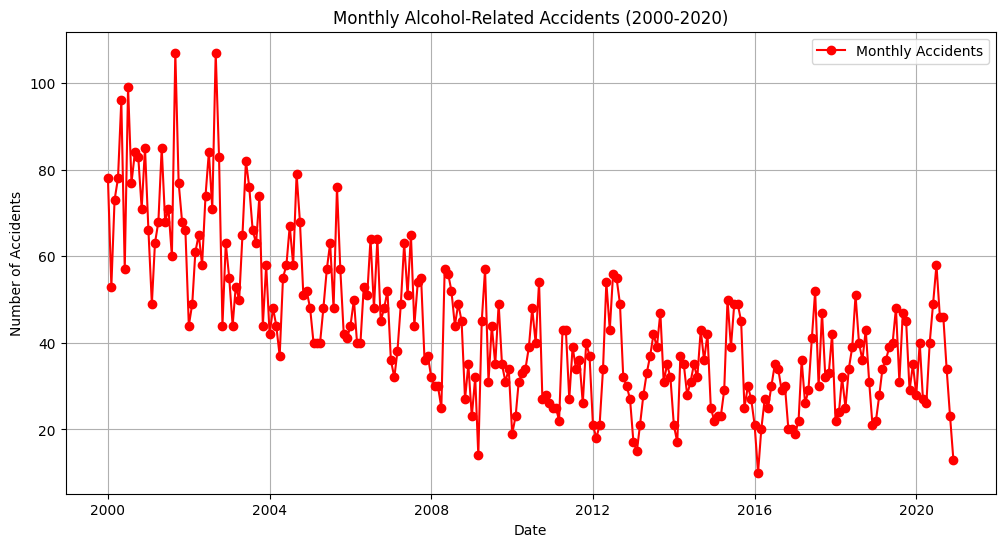

In [18]:
import matplotlib.pyplot as plt

# Plot time-series data with a specific color (e.g., 'red')
plt.figure(figsize=(12, 6))
plt.plot(
    filtered_dataset.index,
    filtered_dataset['Value'],
    marker='o',
    linestyle='-',
    color='red',  # Change the trend line color here
    label='Monthly Accidents'
)
plt.title('Monthly Alcohol-Related Accidents (2000-2020)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
sarima_model = SARIMAX(filtered_dataset['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Print model summary
print(sarima_model.summary())

# Save the trained model
import pickle
with open("sarima_model_akshat.pkl", "wb") as f:
    pickle.dump(sarima_model, f)
print("Model saved as 'sarima_model_akshat.pkl'")

/Users/akshat/Documents/Model Design AI/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/akshat/Documents/Model Design AI/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49177D+00    |proj g|=  1.00200D-01

At iterate    5    f=  3.40558D+00    |proj g|=  1.38624D-02

At iterate   10    f=  3.38835D+00    |proj g|=  2.83595D-03

At iterate   15    f=  3.38814D+00    |proj g|=  1.01525D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.137D-06   3.388D+00
  F =   3.3881425907462375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

In [24]:
# Forecast the next 12 months
forecast = sarima_model.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Save predictions to a file
forecast_results = pd.DataFrame({
    "Predicted_Value": forecast_values,
    "Lower_CI": forecast_ci.iloc[:, 0],
    "Upper_CI": forecast_ci.iloc[:, 1]
})
forecast_results.to_csv("forecast_results.csv", index_label="Date")
print("Forecast saved as 'forecast_results.csv'")

Forecast saved as 'forecast_results.csv'


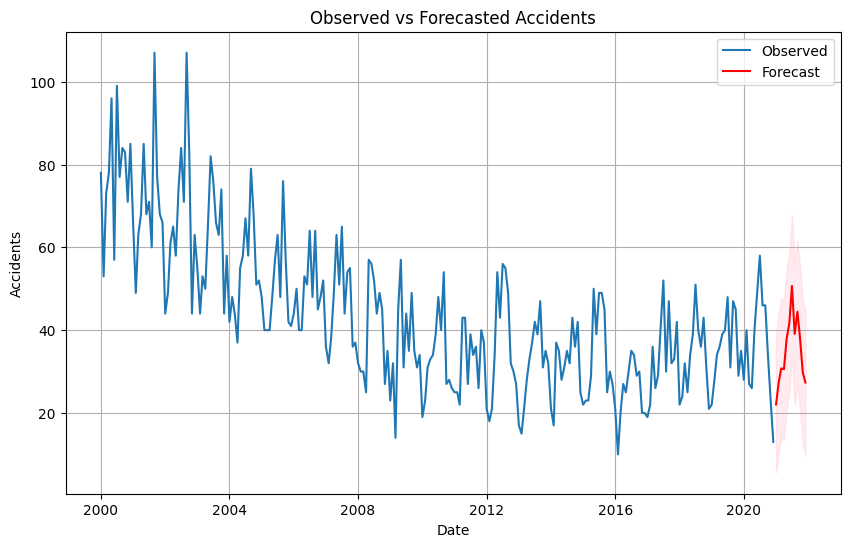

In [25]:
import matplotlib.pyplot as plt

# Plot observed values and forecast
plt.figure(figsize=(10, 6))
plt.plot(filtered_dataset.index, filtered_dataset['Value'], label="Observed")
plt.plot(forecast_values.index, forecast_values, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Accidents")
plt.title("Observed vs Forecasted Accidents")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Load the saved model
with open("sarima_model_akshat.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make a new prediction
new_forecast = loaded_model.get_forecast(steps=1)
new_prediction = new_forecast.predicted_mean.iloc[0]
print(f"Next month's predicted accident count: {new_prediction}")

Next month's predicted accident count: 22.04806756429951
